In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import scipy.interpolate
from itertools import combinations
import plotly.offline as py
from collections import OrderedDict
import plotly.figure_factory as ff

import numpy as np



In [445]:
import scipy as sp

In [23]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
# distances, indices = nbrs.kneighbors(X)

In [226]:
np.random.seed(23)

n_points = 100

theta = 2*np.pi*np.random.random(n_points)
x = np.cos(theta)
y = np.sin(theta)

a = np.linspace(0,2*np.pi, n_points)

xx = np.cos(np.linspace(0,2*np.pi, 1000))
yy = np.sin(np.linspace(0,2*np.pi, 1000))


x_noise = (np.random.random(n_points)-0.5)*.25
y_noise = (np.random.random(n_points)-0.5)*.25

In [227]:
circle_trace = go.Scatter(x=xx, y=yy, name='circle',
                         line=dict(color='black'),
#                           visible='legendonly',
                          hoverinfo='skip'
)
fig = px.scatter(x=x+x_noise,y=y+y_noise, width=500, height=500)
fig.add_trace(circle_trace)
fig.update_layout(xaxis_range=(-1.2, 1.2), yaxis_range=(-1.2, 1.2))

fig.show()

In [225]:
# aa = np.arange(10)
# for a in aa:
#     if a%2==0:
#         aa.pop(a)

In [ ]:
circle_trace = go.Scatter(x=xx, y=yy, name='circle',
                         line=dict(color='black'),
#                           visible='legendonly',
                          hoverinfo='skip'
)
fig = px.scatter(x=x+x_noise,y=y+y_noise, width=500, height=500)
fig.add_trace(circle_trace)
fig.update_layout(xaxis_range=(-1.2, 1.2), yaxis_range=(-1.2, 1.2))

fig.show()

In [16]:
scatter_df = pd.DataFrame({'x':x+x_noise, 'y':y+y_noise})#.reset_index()

In [17]:
fig = px.scatter(scatter_df, x='x',y='y',# hover_data = ['index'], 
                 width=500, height=500)
fig.add_trace(circle_trace)
fig.update_layout(xaxis_range=(-1.2, 1.2), yaxis_range=(-1.2, 1.2))

In [18]:
from ipywidgets import HTML
details = HTML()
neighbors_info = HTML()

In [19]:
the_fig = go.FigureWidget(fig)
# add an empty trace to update scatter data on_hover
the_fig.add_trace(go.Scatter(name='clicked 2-NN'))

scatter = the_fig.data[0]

svd_scatter = the_fig.data[2]

In [27]:
def hover_fn(trace, points, state):
    ind = points.point_inds[0]
    details.value = scatter_df.iloc[ind].to_frame().T.to_html()

scatter.on_hover(hover_fn)


In [28]:
number_of_neighbors = 3
X = np.array(scatter_df)
nbrs = NearestNeighbors(n_neighbors=number_of_neighbors).fit(X)
distances, indices = nbrs.kneighbors(X)

In [29]:
def click_fn(trace, points, state):
#     print('points:', points)
    click_idx = points.point_inds[0]
    info = OrderedDict()
    info['Point'] = click_idx
    info['First Neighbor'] = '{} , distance: {:04f}'.format(indices[click_idx][1], distances[click_idx][1])
    info['Second Neighbor'] = '{} , distance: {:04f}'.format(indices[click_idx][2], distances[click_idx][2])
    clicked_df = scatter_df.iloc[indices[click_idx]]
    svd_scatter = go.Scatter(x=clicked_df.x, y = clicked_df.y, mode= 'lines+markers',
          marker= {'color': 'red'}, name='clicked 2-NN')
#     print(clicked_df)
#     neighbors_info.value = 'Neighbors Info: {}'.format(click_idx)
    neighbors_info.value = pd.Series(info).to_frame().to_html()
    
scatter.on_click(click_fn)

In [ ]:
clicked_df = scatter_df.iloc[indices[9]]
print(clicked_df)

In [ ]:
go.Scatter(x=clicked_df.x, y = clicked_df.y, mode= 'lines+markers',
          marker= {'color': 'red'}, name='clicked 2-NN')

In [ ]:
## the points info when clicked
# points: Points(point_inds=[21],
#        xs=[0.6268592624517482],
#        ys=[0.7791325080359889],
#        trace_name='',
#        trace_index=0)

In [30]:
from ipywidgets import HBox, VBox
# VBox([fig,
#       opacity_slider,
#       HBox([image_widget, details])])
VBox([HBox([the_fig, VBox([details, neighbors_info]) ]) ])

    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',…

In [128]:
indices[19]

array([19, 18, 13])

In [137]:
indices[np.array([18,19])]

array([[18, 19,  3],
       [19, 18, 13]])

In [141]:
indices[idx].flatten()

array([18, 19,  3, 19, 18, 13])

In [142]:
idx =np.array([18,19])
scatter_df.iloc[indices.flatten()]

,x,y
18,-0.271678,1.007992
19,-0.268274,0.945666
3,-0.165168,1.012127
19,-0.268274,0.945666
18,-0.271678,1.007992
13,-0.345263,0.923738


In [33]:
M = scatter_df.iloc[indices[18]].values

In [102]:
M

array([[-0.27167825,  1.00799217],
       [-0.26827402,  0.94566617],
       [-0.16516791,  1.0121269 ]])

In [117]:
np.mean(M,axis = 0)

array([-0.23504006,  0.98859508])

In [90]:
M_dm = M - np.mean(M,axis = 0)

In [91]:
M_dm

array([[-0.03663819,  0.01939709],
       [-0.03323396, -0.04292891],
       [ 0.06987215,  0.02353182]])

In [145]:
fig = px.scatter(x = M[:,0], y = M[:,1])
fig.add_trace({
     'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
     'legendgroup': '',
     'marker': {'color': 'black', 'symbol': 'circle'},
     'mode': 'markers',
     'name': '',
     'orientation': 'v',
     'showlegend': False,
     'x': np.array(np.mean(M,axis = 0)[0]),
     'xaxis': 'x',
     'y': np.array(np.mean(M,axis = 0)[1]),
     'yaxis': 'y'
 })
fig.add_trace({
     'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
     'legendgroup': '',
     'marker': {'color': 'red', 'symbol': 'circle'},
     'mode': 'lines',
     'name': '',
     'orientation': 'v',
     'showlegend': False,
     'x': (np.mean(M,axis = 0)[0] + [0.0, Vt[0,0]]),
     'xaxis': 'x',
     'y': (np.mean(M,axis = 0)[1] + [0.0, Vt[0,1]]),
     'yaxis': 'y'
 })
fig.add_trace({
     'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
     'legendgroup': '',
     'marker': {'color': 'green', 'symbol': 'circle'},
     'mode': 'lines',
     'name': '',
     'orientation': 'v',
     'showlegend': False,
     'x': (np.mean(M,axis = 0)[0] + [0.0, Vt[1,0]]),
     'xaxis': 'x',
     'y': (np.mean(M,axis = 0)[1] + [0.0, Vt[1,1]]),
     'yaxis': 'y'
 })
fig.update_layout(height=500, width=500)

(Scatter({
     'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
     'legendgroup': '',
     'marker': {'color': '#636efa', 'symbol': 'circle'},
     'mode': 'markers',
     'name': '',
     'orientation': 'v',
     'showlegend': False,
     'x': array([-0.27167825, -0.26827402, -0.16516791]),
     'xaxis': 'x',
     'y': array([1.00799217, 0.94566617, 1.0121269 ]),
     'yaxis': 'y'
 }),)

In [149]:
fig = px.scatter(x = M[:,0], y = M[:,1])
fig.add_trace({
     'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
     'legendgroup': '',
     'marker': {'color': 'black', 'symbol': 'circle'},
     'mode': 'markers',
     'name': '',
     'orientation': 'v',
     'showlegend': False,
     'x': np.array(np.mean(M,axis = 0)[0]),
     'xaxis': 'x',
     'y': np.array(np.mean(M,axis = 0)[1]),
     'yaxis': 'y'
 })
fig.add_trace({
     'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
     'legendgroup': '',
     'marker': {'color': 'red', 'symbol': 'circle'},
     'mode': 'lines',
     'name': '',
     'orientation': 'v',
     'showlegend': False,
     'x': (np.mean(M,axis = 0)[0] + [0.0, Vt[0,0]*.1]),
     'xaxis': 'x',
     'y': (np.mean(M,axis = 0)[1] + [0.0, Vt[0,1]*.1]),
     'yaxis': 'y'
 })
fig.add_trace({
     'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
     'legendgroup': '',
     'marker': {'color': 'red', 'symbol': 'circle'},
     'mode': 'lines',
     'name': '',
     'orientation': 'v',
     'showlegend': False,
     'x': (np.mean(M,axis = 0)[0] + [0.0, Vt[1,0]*.1]),
     'xaxis': 'x',
     'y': (np.mean(M,axis = 0)[1] + [0.0, Vt[1,1]*.1]),
     'yaxis': 'y'
 })
# fig.update_layout(height=500, width=500)

In [157]:
U, s, Vt = np.linalg.svd(M, full_matrices=True)

In [143]:
Vt

array([[ 0.23096348, -0.97296242],
       [ 0.97296242,  0.23096348]])

In [161]:
s[-1]/s.sum()

0.048767645231759804

In [154]:
s*Vt

array([[ 0.40663001, -0.08782079],
       [ 1.71297956,  0.02084705]])

In [159]:
np.linalg.norm(s*Vt,axis=0)[-1]/sum(np.linalg.norm(s*Vt,axis=0))

0.09026123827475824

In [182]:
M

array([[-0.27167825,  1.00799217],
       [-0.26827402,  0.94566617],
       [-0.16516791,  1.0121269 ]])

In [197]:
s, s/s.sum()

(array([1.76058142, 0.09026124]), array([0.95123235, 0.04876765]))

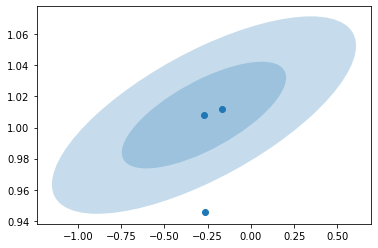

In [235]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
fig,ax=plt.subplots()
ax.scatter(M[:,0],M[:,1],)
# X,Y = M.mean(axis = 0)
X,Y = M[0,:]
# X,Y = 0,0
W,H = s
# W,H = s/s.sum()
THETA = np.math.acos(Vt[0,-1])
e = Ellipse(
        xy=(X,Y),
        width=W, 
        height=H,
        angle=THETA,
    alpha = 0.25
    )
ax.add_patch(e)
W,H = s/s.sum()
e2 = Ellipse(
        xy=(X,Y),
        width=W, 
        height=H,
        angle=THETA,
    alpha = 0.25
    )
ax.add_patch(e2)

In [78]:
S = np.zeros(M.shape)
np.fill_diagonal(S, s)

In [79]:
U[:,:2]*s

array([[-1.04348625, -0.03152335],
       [-0.98205914, -0.04260619],
       [-1.0229092 ,  0.07306218]])

In [80]:
U, U@S, U@S@V

(array([[-0.59269412, -0.34924569, -0.72576934],
        [-0.55780388, -0.47203195,  0.68267171],
        [-0.58100647,  0.80945246,  0.08495996]]),
 array([[-1.04348625, -0.03152335],
        [-0.98205914, -0.04260619],
        [-1.0229092 ,  0.07306218]]),
 array([[-0.27167825,  1.00799217],
        [-0.26827402,  0.94566617],
        [-0.16516791,  1.0121269 ]]))

In [84]:
Vt

array([[ 0.23096348, -0.97296242],
       [ 0.97296242,  0.23096348]])

In [165]:
M.mean(axis = 0)

array([-0.23504006,  0.98859508])

In [ ]:
number_of_neighbors = 3
X = np.array(scatter_df)
nbrs = NearestNeighbors(n_neighbors=number_of_neighbors).fit(X)
distances, indices = nbrs.kneighbors(X)

In [ ]:
distances, indices = nbrs.kneighbors(X)

In [ ]:
distances[2]

In [ ]:
indices[2]

In [ ]:
for idx, vals in enumerate(zip(distances[:2], indices[:2])):
    print(idx, vals)

In [ ]:
px.imshow(nbrs.kneighbors_graph(X).toarray() - np.identity(X.shape[0]))

In [ ]:
clicked_df = scatter_df.iloc[indices[9]]
print(clicked_df)

In [ ]:
U, sigma, V = np.linalg.svd(clicked_df.values)

In [ ]:
U[:,:len(sigma)]@np.diag(sigma)@V

In [ ]:
U[:,0]@ U[:,1],  U[:,1]@ U[:,2], U[:,0]@ U[:,2]

In [ ]:
U[0,:]@ U[1,:],  U[1,:]@ U[2,:], U[0,:]@ U[2,:]

In [ ]:
 V[:,0]@ V[:,1],  V[1,:]@V[0,:]

In [ ]:
px.line(x= V[:,0], y = V[:,1])

In [ ]:
np.zeros(2)

In [ ]:
np.random.seed(23)

n_points = 100

theta = 2*np.pi*np.random.random(n_points)
x = np.cos(theta)
y = np.sin(theta)

x_noise = (np.random.random(n_points)-0.5)*.25
y_noise = (np.random.random(n_points)-0.5)*.25

In [ ]:
df = pd.DataFrame({'x':x+x_noise,'y':y+y_noise})

X = np.array([x+x_noise, y+y_noise]).T

n, d = X.shape

nbrs = NearestNeighbors(n_neighbors=d+1).fit(X)
distances, indices = nbrs.kneighbors(X)

In [237]:
df = pd.DataFrame({'x':x+x_noise,'y':y+y_noise})

In [238]:
X = np.array([x+x_noise, y+y_noise]).T

In [241]:
n, d = X.shape

In [311]:
nbrs = NearestNeighbors(n_neighbors=d+1).fit(X)
distances, indices = nbrs.kneighbors(X)

In [467]:
distances

array([[0.        , 0.0407354 , 0.0803969 ],
       [0.        , 0.04035783, 0.08034372],
       [0.        , 0.15640654, 0.26813316],
       [0.        , 0.10003505, 0.13543878],
       [0.        , 0.04856607, 0.06692512],
       [0.        , 0.08153057, 0.12576997],
       [0.        , 0.06359721, 0.08837602],
       [0.        , 0.02881352, 0.15294273],
       [0.        , 0.01831025, 0.05951936],
       [0.        , 0.01545218, 0.0398532 ],
       [0.        , 0.05871841, 0.07780874],
       [0.        , 0.03268455, 0.06754831],
       [0.        , 0.03268455, 0.03524527],
       [0.        , 0.04754925, 0.06243576],
       [0.        , 0.05150459, 0.06570736],
       [0.        , 0.12685342, 0.13334045],
       [0.        , 0.07627141, 0.09724446],
       [0.        , 0.07256295, 0.08593988],
       [0.        , 0.04754925, 0.05058409],
       [0.        , 0.05058409, 0.06243576],
       [0.        , 0.09859651, 0.12167885],
       [0.        , 0.07059883, 0.07219032],
       [0.

In [ ]:
# def EuclideanDistances(X):
#     n = size(data, 2)
#     D = zeros(T, n, n)
#     D = map(Base.Iterators.product(1:n, 1:n)) do i
#         if i[1] < i[2]
#             return LinearAlgebra.norm(data[:,i[1]] - data[:,i[2]])
#         else
#             return 0.0
#         end
#     end

#     return (D+transpose(D))

In [312]:
distances[0]

array([0.       , 0.0407354, 0.0803969])

In [314]:
indices[0]

array([ 0, 39, 51])

In [317]:
np.linalg.norm(X[0]-X[0])

0.0

In [318]:
np.linalg.norm(X[0]-X[39])

0.040735404048998

In [319]:
np.linalg.norm(X[0]-X[51])

0.08039689858752706

In [254]:
counter = 0
for idx, row in enumerate(X):
    if idx < 10:
        print(indices[idx], row, )
    else:
        break

[ 0 39 51] [-0.95823446 -0.21651713]
[ 1 49 65] [ 0.96207369 -0.27177005]
[ 2 90 31] [ 0.03202933 -1.0898838 ]
[ 3 19 18] [-0.25321972  1.0567469 ]
[ 4 45 63] [0.05718168 1.09219487]
[ 5 71 42] [-0.48286581 -0.96016078]
[ 6 44 38] [0.5047153  0.82066482]
[ 7 81 97] [-0.74333059  0.65059901]
[ 8 64 93] [-0.82595047 -0.62694001]
[ 9 94 26] [-0.80291641  0.41184115]


In [335]:

# Ms = [X[indices[idx]] for idx, row in enumerate(X)]
Ms = [X[idx] for idx in indices]

Vs = [np.linalg.svd(M, full_matrices=True)[-1] for M in Ms]

In [295]:
sigma = .05
s = np.ones(d)
s[-1] = sigma


In [368]:
Qs = [V.T*s@V for V in Vs]

In [371]:
dists = weighted_distance_matrix(X)

In [372]:
D = np.zeros([n,n])
n

100

In [380]:
u,v = X[[2,7]]

In [387]:
Qs[2], Qs[7]

(array([[0.05683036, 0.08026321],
        [0.08026321, 0.99316964]]),
 array([[ 0.63874746, -0.46117948],
        [-0.46117948,  0.41125254]]))

In [383]:
u-v

array([ 0.77535991, -1.74048281])

In [384]:
h = (u-v)/np.linalg.norm(u-v)

In [396]:
a1 = h.T@Qs[2]@h
a2 = h.T@Qs[7]@h

In [399]:
a1

0.7784472577346345

In [400]:
2*dists[2,7]/(np.sqrt(a1)+np.sqrt(a2))

0.9520010522411739

In [519]:
def euclidean_distance_matrix(data):
    n = data.shape[0]
    D = np.zeros([n,n])
    
    for i, j in combinations(np.arange(n),2):
        D[i,j] = np.linalg.norm(data[i] - data[j])
    
    return (D + D.T)

def weighted_distance_matrix(data, symmetric = True):
    n = data.shape[0]
    D = np.zeros([n,n])
    
    for i, j in combinations(np.arange(n),2):
        D[i,j] = np.linalg.norm(data[i] - data[j])
    
    return (D + D.T)/D.max()


def euclidean_distance_matrix(data, normalize = False, symmetric = True):
    n = data.shape[0]
    D = np.zeros([n,n])
    
    for i, j in combinations(np.arange(n),2):
        D[i,j] = np.linalg.norm(data[i] - data[j])
    
    if symmetric:
        D = D + D.T
    
    if normalize:
        return D/D.max()
        
    else:
        return D

def ellipsoid_distances(data, sigma=1.0, symmetric = True):
    n, d = data.shape
    
    
    Ms = [data[idx] for idx in indices]
    # in U, Sigma, V.T = SVD(M) get V.T
    Vs = [np.linalg.svd(M, full_matrices=True)[-1] for M in Ms]

    s = np.ones(d)
    s[-1] = sigma
    Qs = [V.T*s@V for V in Vs]

    dists = euclidean_distance_matrix(data, normalize=True)
    D = np.zeros([n,n])

    for i,j in combinations(np.arange(n),2):
        Qi = Qs[i]
        Qj = Qs[j]
        u, v = data[[i, j]]

        h = (u-v)/np.linalg.norm(u-v)
        a1 = h.T@Qs[i]@h
        a2 = h.T@Qs[j]@h

        D[i,j] = 2*dists[i, j]/(np.sqrt(a1)+np.sqrt(a2))
    
    if symmetric:
        return D + D.T
    
    else:
        return D


In [459]:
Eucl_Dist = euclidean_distance_matrix(X, symmetric = False)
Wght_Dist = euclidean_distance_matrix(X, normalize = True, symmetric = False)
Elps_Dist = ellipsoid_distances(X, sigma = 0.05, symmetric = False)

In [465]:
px.imshow(np.where(Eucl_Dist == 0, None, Eucl_Dist))

In [466]:
px.histogram(np.where(Eucl_Dist == 0, None, Eucl_Dist).reshape(100*100, ))



In [464]:
px.imshow(np.where(Wght_Dist == 0, None, Wght_Dist))

In [463]:
px.histogram(np.where(Wght_Dist == 0, None, Wght_Dist).reshape(100*100, ))


In [456]:
px.imshow(np.where(Elps_Dist == 0, None, Elps_Dist))

In [453]:
sp.sparse.csr_matrixa

scipy.sparse.csr.csr_matrix

In [439]:
# Eucl_Dist.reshape(100*100, )
px.histogram(Wght_Dist.reshape(100*100, ))

In [457]:
px.histogram(np.where(Elps_Dist == 0, None, Elps_Dist).reshape(100*100, ))

In [474]:
small_X = X[:10]
n, d = small_X.shape
all_nbrs = NearestNeighbors(n_neighbors=n).fit(small_X)
all_distances, all_indices = all_nbrs.kneighbors(small_X)

In [480]:
help(euclidean_distance_matrix)

Help on function euclidean_distance_matrix in module __main__:

euclidean_distance_matrix(data, normalize=False, symmetric=True)



In [484]:
all_indices

array([[0, 8, 9, 5, 7, 2, 3, 4, 6, 1],
       [1, 6, 2, 5, 4, 3, 8, 9, 0, 7],
       [2, 5, 8, 1, 0, 9, 7, 6, 3, 4],
       [3, 4, 7, 6, 9, 0, 8, 1, 5, 2],
       [4, 3, 6, 7, 9, 1, 0, 8, 5, 2],
       [5, 8, 2, 0, 9, 1, 7, 3, 6, 4],
       [6, 4, 3, 1, 7, 9, 0, 8, 2, 5],
       [7, 9, 3, 0, 4, 6, 8, 5, 2, 1],
       [8, 0, 5, 2, 9, 7, 3, 1, 4, 6],
       [9, 7, 0, 3, 8, 4, 6, 5, 2, 1]])

In [487]:

D = np.zeros(all_indices.shape)
for i, row in enumerate(all_indices):    
    for idx, j in enumerate(row):
        D[i, j] = idx

In [514]:
def neighbors_distance(data):
    n, d = data.shape
    assert n > 1, 'need to have more than one observation for distance calculation'
    all_nbrs = NearestNeighbors(n_neighbors=n).fit(data)
    all_indices = all_nbrs.kneighbors(data)[-1]
    
    D = np.zeros(all_indices.shape)
    for i, row in enumerate(all_indices):    
        for idx, j in enumerate(row):
            D[i, j] = idx
    return D/(n-1)

In [518]:
neighbors_distance(small_X).round(2)

array([[0.  , 1.  , 0.56, 0.67, 0.78, 0.33, 0.89, 0.44, 0.11, 0.22],
       [0.89, 0.  , 0.22, 0.56, 0.44, 0.33, 0.11, 1.  , 0.67, 0.78],
       [0.44, 0.33, 0.  , 0.89, 1.  , 0.11, 0.78, 0.67, 0.22, 0.56],
       [0.56, 0.78, 1.  , 0.  , 0.11, 0.89, 0.33, 0.22, 0.67, 0.44],
       [0.67, 0.56, 1.  , 0.11, 0.  , 0.89, 0.22, 0.33, 0.78, 0.44],
       [0.33, 0.56, 0.22, 0.78, 1.  , 0.  , 0.89, 0.67, 0.11, 0.44],
       [0.67, 0.33, 0.89, 0.22, 0.11, 1.  , 0.  , 0.44, 0.78, 0.56],
       [0.33, 1.  , 0.89, 0.22, 0.44, 0.78, 0.56, 0.  , 0.67, 0.11],
       [0.11, 0.78, 0.33, 0.67, 0.89, 0.22, 1.  , 0.56, 0.  , 0.44],
       [0.22, 1.  , 0.89, 0.33, 0.56, 0.78, 0.67, 0.11, 0.44, 0.  ]])